# Mosiac Plots

Mosiac plots are a great way to juxtapose and configure multiple plots together. Let's see how they work.

## Housing data

For this example, we will use the housing data.

In [20]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [21]:
X.shape, y.shape

((20640, 8), (20640,))

## Mosiac plot by string configuration

Text(0.5, 1.0, 'CDF')

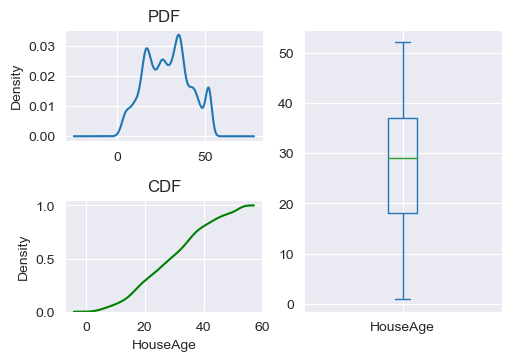

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(layout='constrained', figsize=(5, 3.5))
ax = fig.subplot_mosaic('''
ac
bc
''')

X['HouseAge'].plot(kind='kde', ax=ax['a'])
sns.kdeplot(X['HouseAge'], ax=ax['b'], cumulative=True, color='g')
X['HouseAge'].plot(kind='box', ax=ax['c'])

ax['a'].set_title('PDF')
ax['b'].set_title('CDF')

## Mosiac plot by list configuration

Text(0.5, 1.0, 'CDF')

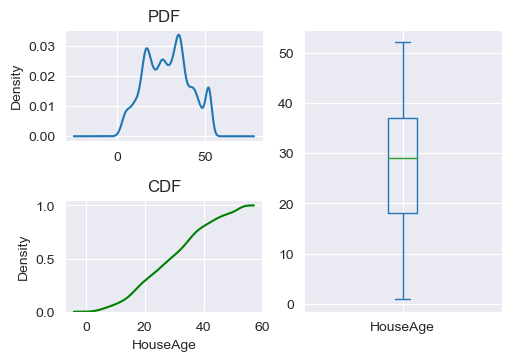

In [25]:
fig = plt.figure(layout='constrained', figsize=(5, 3.5))
ax = fig.subplot_mosaic([
    ['pdf', 'box'],
    ['cdf', 'box']
])

X['HouseAge'].plot(kind='kde', ax=ax['pdf'])
sns.kdeplot(X['HouseAge'], ax=ax['cdf'], cumulative=True, color='g')
X['HouseAge'].plot(kind='box', ax=ax['box'])

ax['pdf'].set_title('PDF')
ax['cdf'].set_title('CDF')

## Fancy example

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


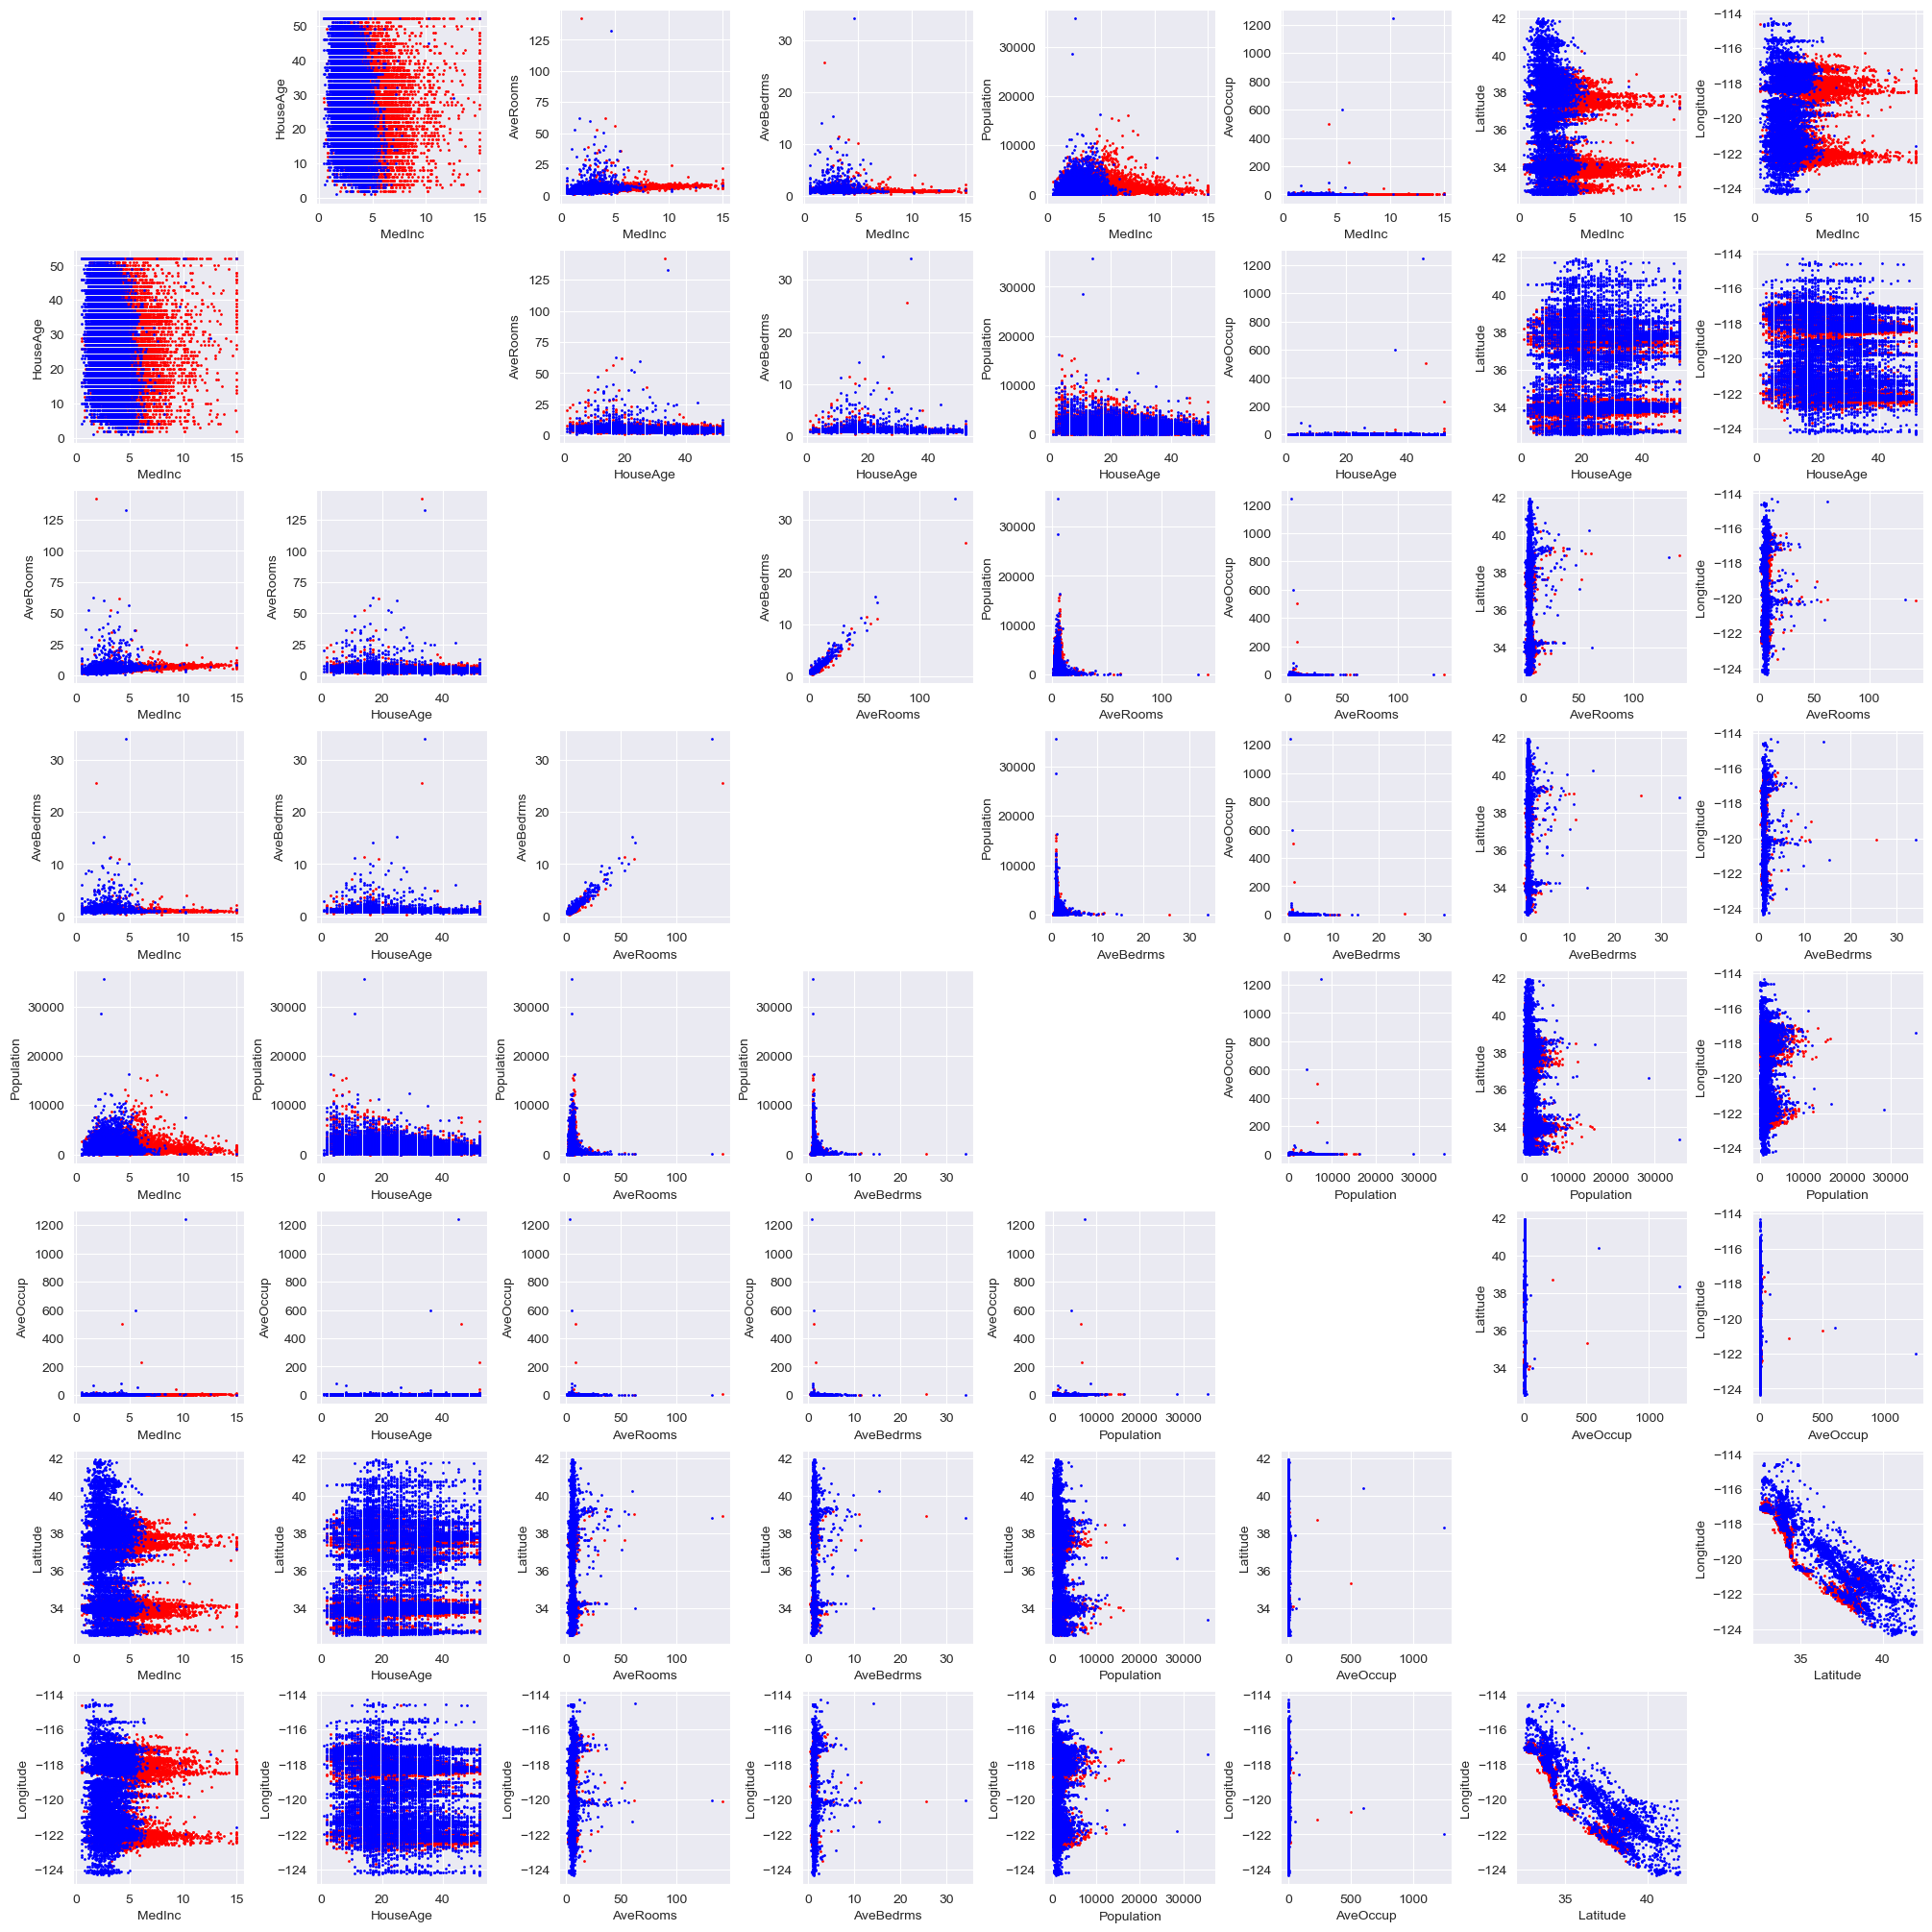

In [27]:
def get_key(r, c, x_col, y_col):
    if r == c:
        return '.'
    if c < r:
        return f'{x_col}_{y_col}_lower'
    return f'{x_col}_{y_col}_upper'

def do_plot(r, c, x_col, y_col, ax):
    k = get_key(r, c, x_col, y_col)
    if '.' == k:
        return
    elif c < r:
        X[y > y.mean()].plot(kind='scatter', y=x_col, x=y_col, ax=ax[k], s=1, color='r')
        X[y <= y.mean()].plot(kind='scatter', y=x_col, x=y_col, ax=ax[k], s=1, color='b')
    else:
        X[y > y.median()].plot(kind='scatter', x=x_col, y=y_col, ax=ax[k], s=1, color='r')
        X[y <= y.median()].plot(kind='scatter', x=x_col, y=y_col, ax=ax[k], s=1, color='b')

mosiac = [[get_key(r, c, x_col, y_col) for c, y_col in enumerate(X.columns)] for r, x_col in enumerate(X.columns)]

fig = plt.figure(layout='constrained', figsize=(20, 20))
ax = fig.subplot_mosaic(mosiac)

_ = [[do_plot(r, c, x_col, y_col, ax) for c, y_col in enumerate(X.columns)] for r, x_col in enumerate(X.columns)]